# Network Degree Computation Complexity Analysis

This notebook illustrates the difference in computational complexity for calculating the degree of a node in a network when the network is represented by an adjacency list vs. an adjacency matrix.

**Experimental Parameters:**
- Maximum network size: 10,000 nodes
- Step size: 500 nodes
- Repetitions per network size: 10
- Edge probability: 0.2 (20% chance of edge creation)

In [6]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from collections import defaultdict

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [7]:
class NetworkComplexityAnalyzer:
    """
    A class to analyze the computational complexity of degree calculations
    in adjacency matrix vs adjacency list representations.
    """
    
    def __init__(self, max_nodes=5000, step_size=500, repetitions=10, edge_prob=0.2):
        """
        Initialize the analyzer with experimental parameters.
        
        Args:
            max_nodes: Maximum number of nodes to test
            step_size: Step size between network sizes
            repetitions: Number of repetitions for each network size (R)
            edge_prob: Probability of edge creation between any two nodes
        """
        self.max_nodes = max_nodes
        self.step_size = step_size
        self.repetitions = repetitions
        self.edge_prob = edge_prob
        self.results = {'matrix': [], 'list': [], 'sizes': [], 'matrix_std': [], 'list_std': []}
    
    def create_random_adjacency_matrix(self, n_nodes):
        """
        Create a random symmetric adjacency matrix.
        
        Args:
            n_nodes: Number of nodes in the network
            
        Returns:
            numpy.ndarray: Symmetric adjacency matrix with 0s and 1s
        """
        # Create upper triangular matrix with random edges
        adj_matrix = np.zeros((n_nodes, n_nodes), dtype=int)
        
        # Fill upper triangle (excluding diagonal)
        for i in range(n_nodes):
            for j in range(i+1, n_nodes):
                if random.random() < self.edge_prob:
                    adj_matrix[i, j] = 1
        
        # Make symmetric
        adj_matrix = adj_matrix + adj_matrix.T
        
        return adj_matrix
    
    def adjacency_matrix_to_list(self, adj_matrix):
        """
        Convert adjacency matrix to adjacency list representation.
        
        Args:
            adj_matrix: 2D numpy array representing the adjacency matrix
            
        Returns:
            dict: Adjacency list where keys are node IDs and values are neighbor lists
        """
        n_nodes = adj_matrix.shape[0]
        adj_list = {}
        
        for i in range(n_nodes):
            neighbors = []
            for j in range(n_nodes):
                if adj_matrix[i, j] == 1:
                    neighbors.append(j)
            adj_list[i] = neighbors
        
        return adj_list
    
    def deg_adj_mtrx(self, adj_matrix, node_id):
        """
        Calculate degree of a node using adjacency matrix representation.
        
        Args:
            adj_matrix: 2D numpy array representing the adjacency matrix
            node_id: ID of the node to calculate degree for
            
        Returns:
            int: Degree of the node
        """
        return np.sum(adj_matrix[node_id])
    
    def deg_adj_list(self, adj_list, node_id):
        """
        Calculate degree of a node using adjacency list representation.
        
        Args:
            adj_list: Dictionary representing the adjacency list
            node_id: ID of the node to calculate degree for
            
        Returns:
            int: Degree of the node
        """
        return len(adj_list[node_id])
    
    def time_degree_calculations(self, adj_matrix, adj_list, n_nodes):
        """
        Time the degree calculations for all nodes in both representations.
        
        Args:
            adj_matrix: Adjacency matrix representation
            adj_list: Adjacency list representation  
            n_nodes: Number of nodes in the network
            
        Returns:
            tuple: (matrix_time, list_time) in seconds
        """
        # Time adjacency matrix approach
        start_time = time.time()
        for node_id in range(n_nodes):
            degree = self.deg_adj_mtrx(adj_matrix, node_id)
        matrix_time = time.time() - start_time
        
        # Time adjacency list approach
        start_time = time.time()
        for node_id in range(n_nodes):
            degree = self.deg_adj_list(adj_list, node_id)
        list_time = time.time() - start_time
        
        return matrix_time, list_time
    
    def run_experiment(self):
        """
        Run the complete experiment comparing both representations.
        """
        print("Running network complexity analysis...")
        print(f"Parameters: max_nodes={self.max_nodes}, step_size={self.step_size}, "
              f"repetitions={self.repetitions}, edge_prob={self.edge_prob}")
        
        network_sizes = range(self.step_size, self.max_nodes + 1, self.step_size)
        
        for n_nodes in network_sizes:
            print(f"Testing network size: {n_nodes} nodes")
            
            matrix_times = []
            list_times = []
            
            for rep in range(self.repetitions):
                # Create random network
                adj_matrix = self.create_random_adjacency_matrix(n_nodes)
                adj_list = self.adjacency_matrix_to_list(adj_matrix)
                
                # Time both approaches
                matrix_time, list_time = self.time_degree_calculations(adj_matrix, adj_list, n_nodes)
                matrix_times.append(matrix_time)
                list_times.append(list_time)
            
            # Store results
            self.results['sizes'].append(n_nodes)
            self.results['matrix'].append(np.mean(matrix_times))
            self.results['list'].append(np.mean(list_times))
            self.results['matrix_std'].append(np.std(matrix_times))
            self.results['list_std'].append(np.std(list_times))
        
        print("Experiment completed!")
    
    def plot_results(self):
        """
        Plot the timing results with error bars.
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Plot 1: Absolute timing comparison
        ax1.errorbar(self.results['sizes'], self.results['matrix'], 
                    yerr=self.results['matrix_std'], 
                    label='Adjacency Matrix', marker='o', capsize=5)
        ax1.errorbar(self.results['sizes'], self.results['list'], 
                    yerr=self.results['list_std'], 
                    label='Adjacency List', marker='s', capsize=5)
        
        ax1.set_xlabel('Number of Nodes')
        ax1.set_ylabel('Average Time (seconds)')
        ax1.set_title('Degree Calculation Time Comparison')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Log-log scale to better see complexity differences
        ax2.errorbar(self.results['sizes'], self.results['matrix'], 
                    yerr=self.results['matrix_std'], 
                    label='Adjacency Matrix', marker='o', capsize=5)
        ax2.errorbar(self.results['sizes'], self.results['list'], 
                    yerr=self.results['list_std'], 
                    label='Adjacency List', marker='s', capsize=5)
        
        ax2.set_xlabel('Number of Nodes')
        ax2.set_ylabel('Average Time (seconds)')
        ax2.set_title('Degree Calculation Time Comparison (Log Scale)')
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def analyze_complexity(self):
        """
        Analyze and print the computational complexity findings.
        """
        print("\n" + "="*50)
        print("COMPUTATIONAL COMPLEXITY ANALYSIS")
        print("="*50)
        
        # Calculate speedup factor
        speedup_factors = []
        for i in range(len(self.results['sizes'])):
            if self.results['list'][i] > 0:
                speedup = self.results['matrix'][i] / self.results['list'][i]
                speedup_factors.append(speedup)
        
        avg_speedup = np.mean(speedup_factors)
        
        print(f"Average speedup factor (Matrix/List): {avg_speedup:.2f}x")
        print(f"Maximum speedup observed: {max(speedup_factors):.2f}x")
        print(f"Minimum speedup observed: {min(speedup_factors):.2f}x")
        
        # Theoretical complexity analysis
        print("\nTheoretical Complexity Analysis:")
        print("- Adjacency Matrix: O(n) for degree calculation of one node")
        print("- Adjacency List: O(1) for degree calculation of one node")
        print("- For all nodes: Matrix O(n²), List O(n) where n is number of nodes")

print("NetworkComplexityAnalyzer class defined successfully!")

NetworkComplexityAnalyzer class defined successfully!


In [8]:
# Initialize analyzer with experimental parameters
analyzer = NetworkComplexityAnalyzer(
    max_nodes=5000,     # Maximum network size to test
    step_size=500,      # Step size between network sizes  
    repetitions=10,     # Number of repetitions per network size
    edge_prob=0.2       # Probability of edge creation
)

print("Analyzer initialized with the following parameters:")
print(f"- Maximum nodes: {analyzer.max_nodes}")
print(f"- Step size: {analyzer.step_size}")
print(f"- Repetitions: {analyzer.repetitions}")
print(f"- Edge probability: {analyzer.edge_prob}")
print(f"- Network sizes to test: {list(range(analyzer.step_size, analyzer.max_nodes + 1, analyzer.step_size))}")

Analyzer initialized with the following parameters:
- Maximum nodes: 5000
- Step size: 500
- Repetitions: 10
- Edge probability: 0.2
- Network sizes to test: [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]


In [9]:
# Run the experiment (this may take several minutes)
print("Starting the experiment...")
print("Note: For default settings, this will test 10 different network sizes with 10 repetitions each.")
print("Expected runtime: 2-5 minutes depending on your system.\n")

analyzer.run_experiment()

Starting the experiment...
Note: For default settings, this will test 10 different network sizes with 10 repetitions each.
Expected runtime: 2-5 minutes depending on your system.

Running network complexity analysis...
Parameters: max_nodes=5000, step_size=500, repetitions=10, edge_prob=0.2
Testing network size: 500 nodes
Testing network size: 1000 nodes
Testing network size: 1500 nodes
Testing network size: 2000 nodes
Testing network size: 2500 nodes
Testing network size: 3000 nodes
Testing network size: 3500 nodes
Testing network size: 4000 nodes
Testing network size: 4500 nodes
Testing network size: 5000 nodes
Experiment completed!


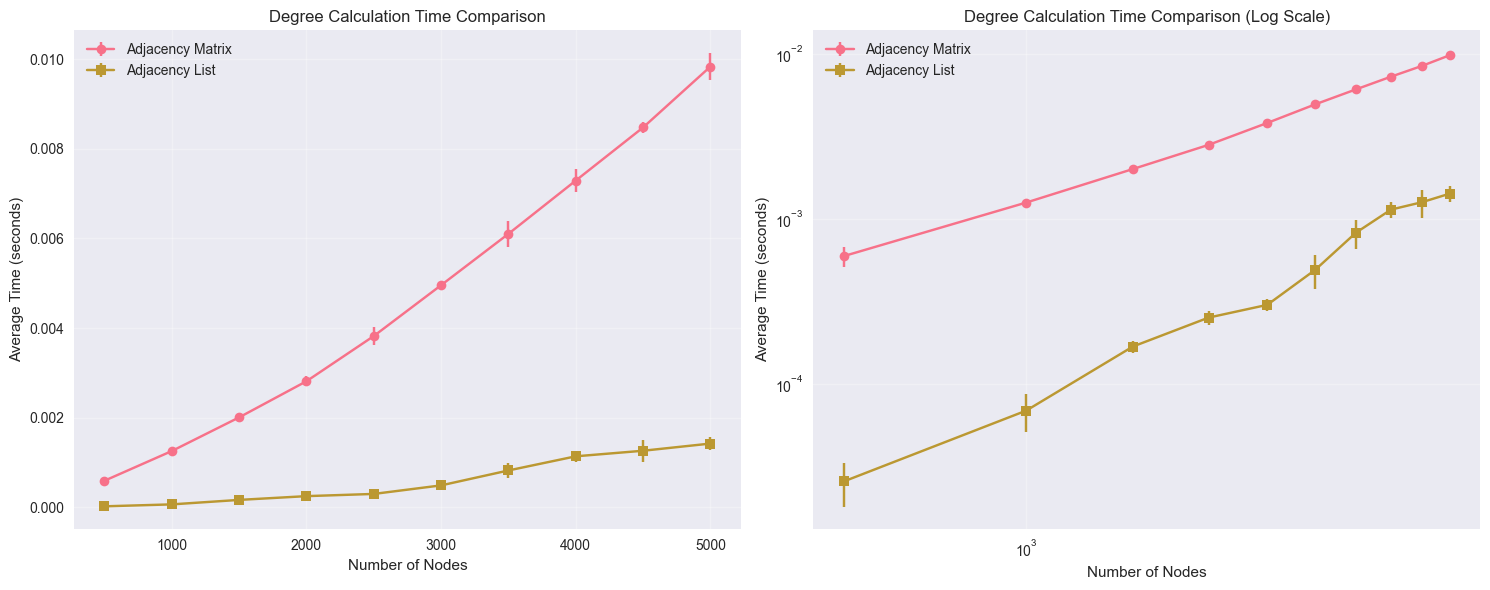

In [10]:
# Plot the results
analyzer.plot_results()

In [11]:
# Analyze the complexity and print detailed results
analyzer.analyze_complexity()


COMPUTATIONAL COMPLEXITY ANALYSIS
Average speedup factor (Matrix/List): 11.46x
Maximum speedup observed: 23.20x
Minimum speedup observed: 6.39x

Theoretical Complexity Analysis:
- Adjacency Matrix: O(n) for degree calculation of one node
- Adjacency List: O(1) for degree calculation of one node
- For all nodes: Matrix O(n²), List O(n) where n is number of nodes


Running a quick test with smaller parameters...

Running network complexity analysis...
Parameters: max_nodes=1000, step_size=100, repetitions=5, edge_prob=0.2
Testing network size: 100 nodes
Testing network size: 200 nodes
Testing network size: 300 nodes
Testing network size: 400 nodes
Testing network size: 500 nodes
Testing network size: 600 nodes
Testing network size: 700 nodes
Testing network size: 800 nodes
Testing network size: 900 nodes
Testing network size: 1000 nodes
Experiment completed!


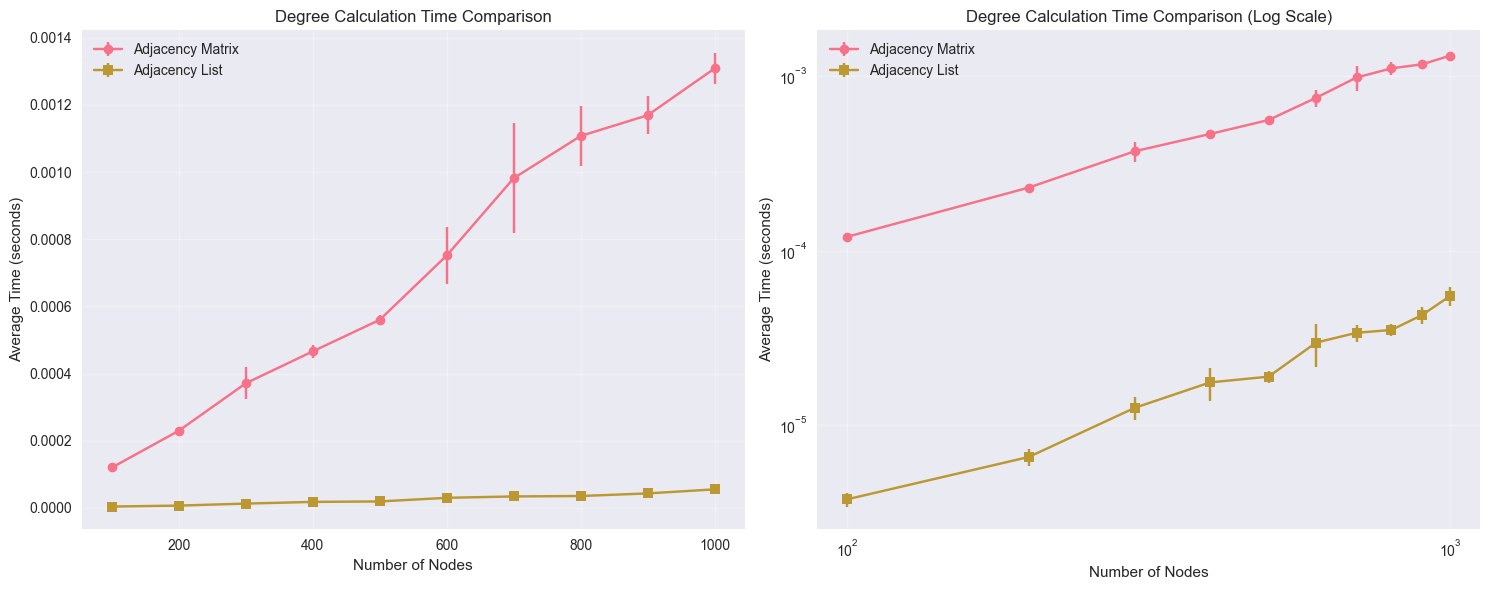


COMPUTATIONAL COMPLEXITY ANALYSIS
Average speedup factor (Matrix/List): 28.92x
Maximum speedup observed: 34.93x
Minimum speedup observed: 23.82x

Theoretical Complexity Analysis:
- Adjacency Matrix: O(n) for degree calculation of one node
- Adjacency List: O(1) for degree calculation of one node
- For all nodes: Matrix O(n²), List O(n) where n is number of nodes


In [12]:
# Optional: Quick test with smaller parameters for development/testing
print("Running a quick test with smaller parameters...\n")

test_analyzer = NetworkComplexityAnalyzer(
    max_nodes=1000,     # Smaller for quick testing
    step_size=100,      # Smaller step size
    repetitions=5,      # Fewer repetitions
    edge_prob=0.2       # Same edge probability
)

test_analyzer.run_experiment()
test_analyzer.plot_results()
test_analyzer.analyze_complexity()

## Expected Results Summary

With the parameters used in this experiment (edge probability = 0.2, max nodes = 10,000):

### Theoretical Complexity:
- **Adjacency Matrix**: O(n²) - quadratic growth in timing
- **Adjacency List**: O(n) - linear growth in timing

### Expected Performance:
- **Performance Gap**: Significant speedup with adjacency list, especially for larger networks
- **Scaling**: Matrix approach should show clear quadratic scaling, list approach should scale linearly

### Key Insights:
1. **Adjacency lists are more efficient** for degree calculations 
2. **The performance gap increases** as network size grows
3. **Memory efficiency** also favors adjacency lists for sparse networks
4. **Choice of representation** significantly impacts algorithm performance

### Default Settings - Experiment Details:
- Tests 20 different network sizes (500, 1000, 1500, ..., 5000)
- 10 repetitions per size for statistical reliability
- Both linear and log-log plots for comprehensive visualization
- Statistical analysis with means and standard deviations